# Raspberry Piについて
ラズパイってどういうものかを簡単に説明します。

Raspberry Pi(ラズパイ)は立派なパソコンです。皆さんが持っているパソコンとラズパイの違いは，とりあえず以下の2点だと思ってください。
- ラズパイのCPUはARMである

皆さんのパソコンのCPUはおそらくx64と呼ばれるものです。一方でラズパイのCPUはARMと呼ばれるもので，主にスマホやタブレットに使われているものになります。どちらでも人間が読むコードレベルでは同じものが動くため，あまり意識することはありませんが，コンピュータが読むアセンブラレベルでは異なってきます。そのため，コンパイルの方法が異なってきます。

- ラズパイにはGPIOが搭載されている

ラズパイにはセンサを制御するためのピン(汎用入出力ピン)が搭載されています。このピンにセンサを接続することで，様々なものを測定することができます。

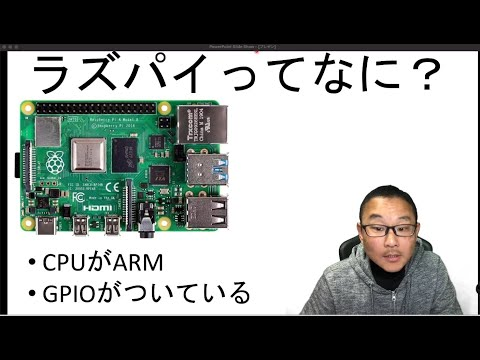

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('2s5VijjuARY', width=400, height=225)

---
# Raspberry Pi OSイメージのインストール
ラズパイへのOSのインストール手順について説明します。




## 下準備
予め，以下の作業を行ってください。

- SSID(WiFiの名前)とWi-Fiに接続するためのパスワードを調べておく。
- PCにSSHクライアントのソフトを入れておく。WindowsにWSLが入っている場合，SSHクライアントは入っています。またMacにも最初から入っています。Linux環境が何もない場合，Windowsでは[PuTTY](https://www.chiark.greenend.org.uk/~sgtatham/putty/)を入れておけばOK。

## インストール
ラズパイに適したLinuxである"Raspberry Pi OS"は[ここ](https://www.raspberrypi.com/software/)からダウンロードできます。
ここからイメージを直接ダウンロードしてSDカードに入れてもいいのですが，インストールをサポートしてくれるWindows用，macOS用のソフト(Raspberry Pi Imager)があるのでこれを使いましょう。

(※)Raspberry Pi OSはDebianです。

次をクリックして[Windows用](https://downloads.raspberrypi.org/imager/imager_latest.exe)，[macOS用](https://downloads.raspberrypi.org/imager/imager_latest.dmg)のどちらかをダウンロードしてインストールしてください。

Raspberry Pi ImagerのAdvanced optionsで以下をセットして"SAVE"してください。
- ホスト名(名簿に記載)。使える文字はa〜zの英字，0〜9の数字，ハイフン(-)で大文字小文字の区別はなし。ピリオドは使えないことに注意！
- Enable SSH (Use password authentication)
- ユーザー名(名簿に記載)とパスワード(名簿に記載)
- Configure wifiでSSIDとパスワード (Wifi country: JP)
- Set local settings (Time zone: Asia/Tokyo, Keyboard layout: jp)

OSは"RASPBERRY PI OS LITE (64-BIT)"を選択し，StorageとしてSDカードを選び書き込みを開始してください。

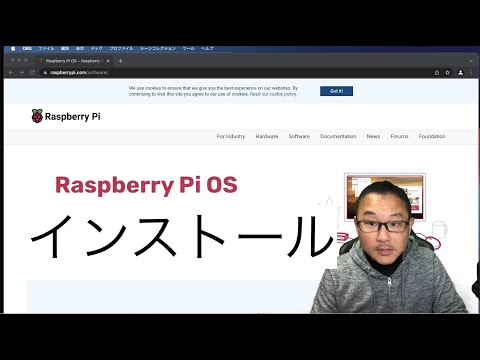

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('qucie7yMVyg', width=400, height=225)

---
## ラズパイの起動
ラズパイに電源アダプタを接続すると赤いLEDが点灯し，起動開始します。
ラズパイにディスプレイを繋いでいない場合，起動がどのようにされているかを見れません。
ディスプレイに繋いだ場合の起動の様子は以下の動画のようですので，参考にしてください。

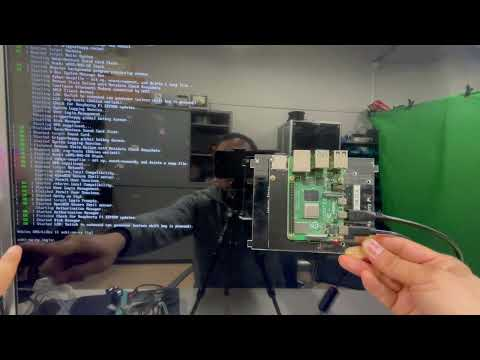

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('nMgXRshvKo4', width=400, height=225)

---
## ラズパイへの接続
ラズパイの起動が完了したら，同じWi-Fi上にあるSSHクライアントからラズパイに接続してみましょう。
以下のコマンドを入力し，その後パスワードを入力してください。

In [ ]:
ssh [リモートユーザー]@[ラズパイのホスト名]

インストールしたOSがどのようなものかを確認してみましょう。

In [ ]:
#OSのバージョンを確認するコマンド
cat /etc/os-release

In [ ]:
#カーネルのバージョンを確認するコマンド
uname -r

In [ ]:
# SHELLを確認するコマンド
echo $SHELL

In [ ]:
#SDカードを焼くときにオプションで設定した項目の変更
#カメラを認識できるようにしておく
# 3 Interface options > I1 Legacy Camera > Yes > OK
sudo raspi-config

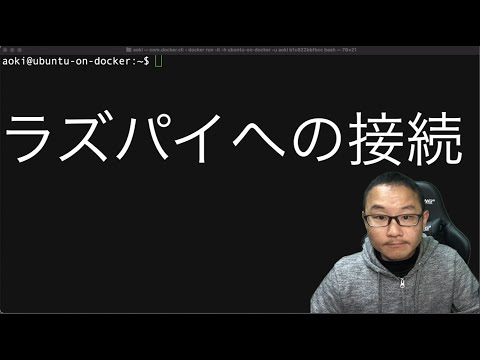

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('S_wHeTsFnBw', width=400, height=225)

### (補足)SSH接続とは
SSH接続がどういうものであるのか，イメージが分かるように以下の動画で解説します。

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('JOMevky4Egs', width=400, height=225)

### (補足)鍵認証によるSSH
SSHによる鍵認証を行ってみましょう。
鍵のペアを作るコマンドは以下です。

In [ ]:
ssh-keygen

~/.ssh/以下に次の2つのファイルができました。

id_rsa #鍵

id_rsa.pub #鍵穴

次に，以下のコマンドで鍵穴をラズパイに取り付けましょう。

In [ ]:
ssh-copy-id -i ~/.ssh/id_rsa.pub [リモートユーザー]@[リモートサーバーのホスト名]

これで鍵認証ができるようになりました。
ついでに，sshコマンドの省略形'rp'を作ってしまいましょう。
以下でrpというコマンドの登録をします。

In [ ]:
echo alias rp=\'ssh y-aoki@aoki-no-rp\' >> ~/.bashrc

以下で，~/.bashrcの変更を反映します。

In [ ]:
source ~/.bashrc

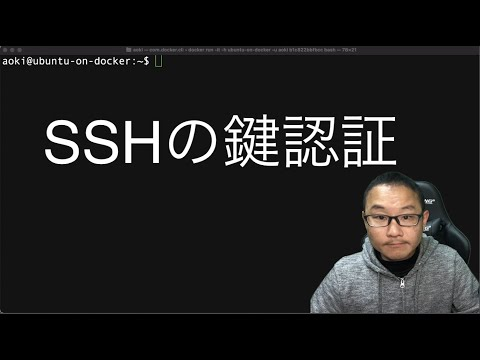

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ga8keeRD_ig', width=400, height=225)

---
## Jupyter labのインストール


In [ ]:
#Jupyter labのインストール
bash <(curl -sL https://raw.githubusercontent.com/YukiAoki-GU/Linux-for-beginners/main/install/jupyer_install.sh)

ブラウザのURL欄に

ラズパイのホスト名:8080

でJupyter labが立ち上がることを確認しましょう。ログインパスワードは

iot-school

です。

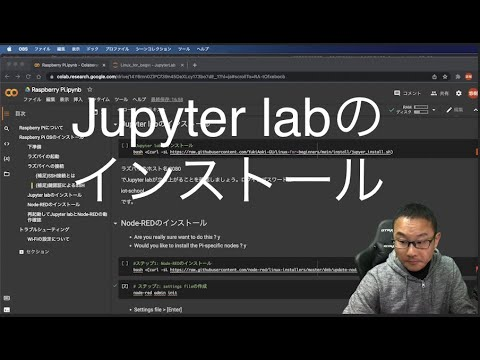

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('4EfQ5E78fjk', width=400, height=225)

---
## Node-REDのインストール

In [ ]:
#ステップ1: Node-REDのインストール
bash <(curl -sL https://raw.githubusercontent.com/node-red/linux-installers/master/deb/update-nodejs-and-nodered)

- Are you really sure want to do this ? y
- Would you like to install the Pi-specific nodes ? y

In [ ]:
# ステップ2: settings fileの作成
node-red admin init

- Settings file > [Enter]
- Do you want to setup user security? > Yes
- Username > 名簿を参照
- Password > 名簿を参照
- User permissions > full access
- Add another user? > No
- Do you want to enable the Projects feature? > No
- Enter a name for your flows file > [Enter]
- Provide a passphrase to encrypt your credentials file > [Enter]
- Select a theme for the editor. > default
- Select the text editor component to use in the Node-RED Editor > ace(default)
- Allow Function nodes to load external modules? > Yes 

In [ ]:
# ステップ3: 追加のインストール
bash <(curl -sL https://raw.githubusercontent.com/YukiAoki-GU/Linux-for-beginners/main/install/nodered_add_install.sh)

ブラウザのURL欄に

ラズパイのホスト名:1880

でNode-REDが立ち上がることを確認しましょう。

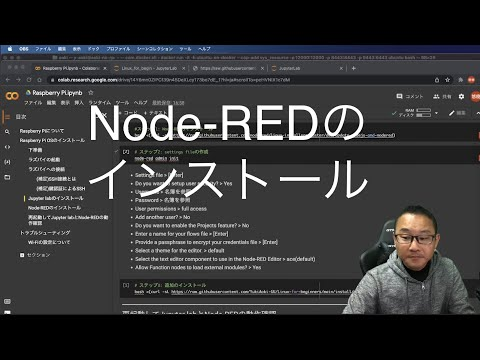

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y3wYb6u6PZk', width=400, height=225)

---
## 再起動してJupyter labとNode-REDの動作確認
一応，再起動して確認してみましょう！

In [ ]:
# 再起動
sudo reboot

---
#トラブルシューティング


## Wi-Fiの設定について
Wi-Fiの設定を一度間違えてしまうと，ラズパイが迷子になってしまうことがあります。SD書き込み時に行ったオプション設定やsudo raspi-configのコマンドで行ったW-Fiの設定ファイルは/etc/wpa_supplicant/wpa_supplicant.confです。しかし，SDカードを別のPCに読み込ませてもこのファイルにはアクセスできません。SDカードの直下に以下の2つの設定ファイルを置くことで，Wi-Fi接続が可能になります。
- wpa_supplicant.conf
- ssh.txt

ここでwpa_supplicant.confの内容はラズパイOS内の/etc/wpa_supplicant/wpa_supplicant.confと同じもので，Wi-FiのSSIDとパスワードが書かれてあります。またssh.txtは空のファイルですが，この名前のファイルを置くことでssh接続が許可されます。

この2つのファイルは単なるテキストファイルですが[こちら](https://mascii.github.io/wpa-supplicant-conf-tool/)からも簡単に作ることができます。